In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
 
    
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-credit-default-risk/previous_application.csv
/kaggle/input/home-credit-default-risk/installments_payments.csv
/kaggle/input/home-credit-default-risk/credit_card_balance.csv
/kaggle/input/home-credit-default-risk/application_train.csv
/kaggle/input/home-credit-default-risk/bureau.csv
/kaggle/input/home-credit-default-risk/application_test.csv
/kaggle/input/home-credit-default-risk/HomeCredit_columns_description.csv
/kaggle/input/home-credit-default-risk/bureau_balance.csv
/kaggle/input/home-credit-default-risk/POS_CASH_balance.csv
/kaggle/input/home-credit-default-risk/sample_submission.csv


In [2]:
train = pd.read_csv("/kaggle/input/home-credit-default-risk/application_train.csv")
test = pd.read_csv("/kaggle/input/home-credit-default-risk/application_test.csv")
sample_submission = pd.read_csv("/kaggle/input/home-credit-default-risk/sample_submission.csv")

In [3]:
pd.options.display.max_columns = 200

In [4]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
train["CODE_GENDER" ].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [6]:
 train["TARGET" ].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [7]:
 train["TARGET" ].value_counts(1)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

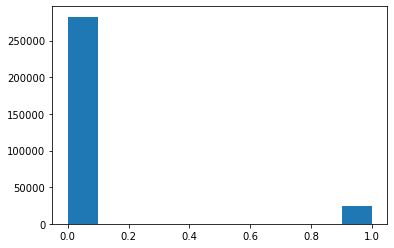

In [8]:
plt.hist( train["TARGET" ])
plt.show()

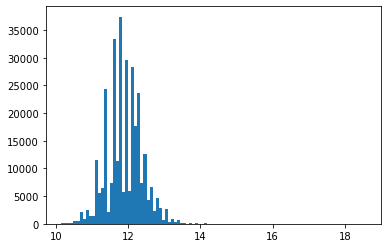

In [9]:
plt.hist( np.log1p(train['AMT_INCOME_TOTAL']  ) , bins = 100)
plt.show()

In [10]:
train['LOG_AMT_INCOME_TOTAL'] = np.log1p(train['AMT_INCOME_TOTAL']  )

In [11]:
test['LOG_AMT_INCOME_TOTAL'] = np.log1p(test['AMT_INCOME_TOTAL']  )

In [12]:
pd.isnull(train['AMT_INCOME_TOTAL'] ).mean()

0.0

In [13]:
pd.isnull(test['AMT_INCOME_TOTAL'] ).mean()

0.0

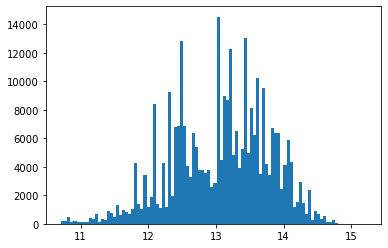

In [14]:
plt.hist( np.log1p(train['AMT_CREDIT']  ) , bins = 100)
plt.show()

In [15]:
train['LOG_AMT_CREDIT'] = np.log1p(train['AMT_CREDIT']  )

In [16]:
test['LOG_AMT_CREDIT'] = np.log1p(test['AMT_CREDIT']  )

In [17]:
pd.isnull(train['AMT_CREDIT'] ).mean()

0.0

In [18]:
pd.isnull(test['AMT_CREDIT'] ).mean()

0.0

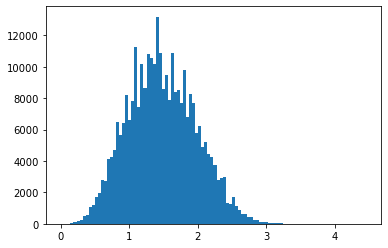

In [19]:


plt.hist( np.log1p(train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL']  ) , bins = 100)
plt.show()

In [20]:
train["AMT_CREDIT_DIV_AMT_INCOME_TOTAL"] = np.log1p(train['AMT_CREDIT'] / train['AMT_INCOME_TOTAL'] )

test["AMT_CREDIT_DIV_AMT_INCOME_TOTAL"] = np.log1p(test['AMT_CREDIT'] / test['AMT_INCOME_TOTAL'] )

In [21]:
from sklearn import preprocessing

In [22]:
scaler = preprocessing.StandardScaler()


In [23]:
train[['AMT_CREDIT']].mean()

AMT_CREDIT    599025.999706
dtype: float64

In [24]:
test[['AMT_CREDIT']].mean()

AMT_CREDIT    516740.435561
dtype: float64

In [25]:
scaler.fit(train[['LOG_AMT_CREDIT']] )


StandardScaler()

In [26]:
scaler.mean_

array([13.07010806])

In [27]:
scaler.scale_

array([0.7151922])

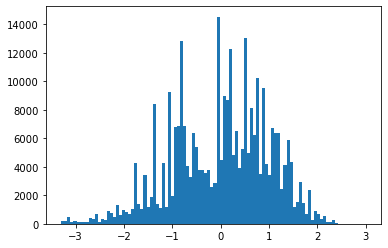

In [28]:
plt.hist(scaler.transform( train[['LOG_AMT_CREDIT']]), bins = 100)
plt.show()

In [29]:
train[['LOG_AMT_CREDIT_NORM']] = scaler.transform( train[['LOG_AMT_CREDIT']])
test[['LOG_AMT_CREDIT_NORM']] = scaler.transform( test[['LOG_AMT_CREDIT']])

In [30]:
scaler.fit(train[['LOG_AMT_INCOME_TOTAL']] )
train[['LOG_AMT_INCOME_TOTAL_NORM']] = scaler.transform( train[['LOG_AMT_INCOME_TOTAL']])
test[['LOG_AMT_INCOME_TOTAL_NORM']] = scaler.transform( test[['LOG_AMT_INCOME_TOTAL']])

In [31]:

scaler.fit(train[['AMT_CREDIT_DIV_AMT_INCOME_TOTAL']] )
train[['AMT_CREDIT_DIV_AMT_INCOME_TOTAL_NORM']] = scaler.transform(train[['AMT_CREDIT_DIV_AMT_INCOME_TOTAL']])
test[['AMT_CREDIT_DIV_AMT_INCOME_TOTAL_NORM']] = scaler.transform(test[['AMT_CREDIT_DIV_AMT_INCOME_TOTAL']])

In [32]:
import seaborn as sns

In [33]:
features = ["LOG_AMT_CREDIT_NORM", "LOG_AMT_INCOME_TOTAL_NORM", "AMT_CREDIT_DIV_AMT_INCOME_TOTAL_NORM"]

In [34]:
corr_matrix = train[features].corr()

In [35]:
corr_matrix

,LOG_AMT_CREDIT_NORM,LOG_AMT_INCOME_TOTAL_NORM,AMT_CREDIT_DIV_AMT_INCOME_TOTAL_NORM
LOG_AMT_CREDIT_NORM,1.000000,0.420705,0.744646
LOG_AMT_INCOME_TOTAL_NORM,0.420705,1.000000,-0.281849
AMT_CREDIT_DIV_AMT_INCOME_TOTAL_NORM,0.744646,-0.281849,1.000000


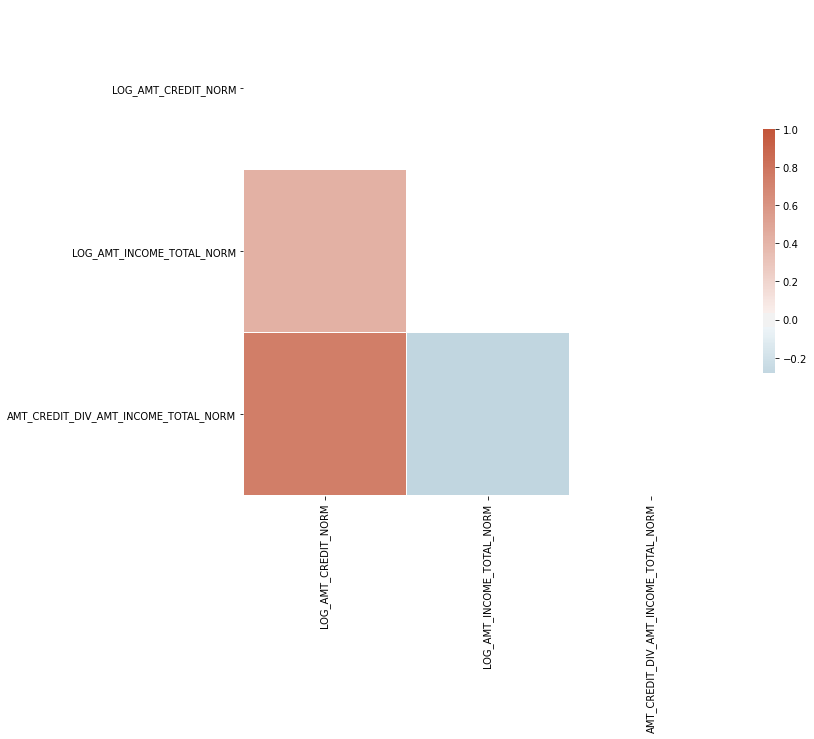

In [36]:

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [37]:
pd.isnull(train['EXT_SOURCE_2']).mean()

0.0021462646864665006

In [38]:
pd.isnull(train['EXT_SOURCE_1']).mean()

0.5638107254699832

In [39]:
pd.isnull(train['EXT_SOURCE_3']).mean()

0.19825307062186392

In [40]:
train[[ 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].corr()

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3
EXT_SOURCE_1,1.000000,0.213982,0.186846
EXT_SOURCE_2,0.213982,1.000000,0.109167
EXT_SOURCE_3,0.186846,0.109167,1.000000


In [41]:
# не хорошо
train['EXT_SOURCE_2'] = train['EXT_SOURCE_2'].fillna(0)

In [42]:
# не хорошо
test['EXT_SOURCE_2'] = test['EXT_SOURCE_2'].fillna(0)

In [43]:
features.append('EXT_SOURCE_2')

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

In [45]:
train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,LOG_AMT_INCOME_TOTAL,LOG_AMT_CREDIT,AMT_CREDIT_DIV_AMT_INCOME_TOTAL,LOG_AMT_CREDIT_NORM,LOG_AMT_INCOME_TOTAL_NORM,AMT_CREDIT_DIV_AMT_INCOME_TOTAL_NORM
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,12.218500,12.915581,1.101238,-0.216063,0.632545,-0.755831
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,12.506181,14.072865,1.756262,1.402080,1.220963,0.567972
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,

In [46]:
model = SGDClassifier()
cross_val_score(model,X = train[features],  y = train['TARGET'], cv = 5, scoring= 'roc_auc')

array([0.55291022, 0.57503892, 0.52949934, 0.61156517, 0.63342558])

In [47]:
np.mean([0.61534402, 0.56531367, 0.59888636, 0.58420094, 0.5208191 ])

0.5769128179999999

In [48]:
np.mean([0.52520136, 0.52270263, 0.53534186, 0.53390723, 0.49782856])

0.522996328

In [49]:
from sklearn.model_selection import KFold

In [50]:
train.loc[2:7,  ["TARGET", "NAME_CONTRACT_TYPE"] ]

,TARGET,NAME_CONTRACT_TYPE
2,0,Revolving loans
3,0,Cash loans
4,0,Cash loans
5,0,Cash loans
6,0,Cash loans
7,0,Cash loans


In [51]:
roc_auc_list = []

kf = KFold(n_splits=5)
kf.get_n_splits(train)

model = SGDClassifier(loss = 'log', penalty = 'elasticnet')
for i, (train_index, test_index) in enumerate(kf.split(train)):
    
    X_train, X_test = train.loc[train_index, features], train.loc[test_index, features ]
    y_train, y_test = train.loc[train_index, 'TARGET'], train.loc[test_index, 'TARGET']

    model.fit(X_train, y_train)
    predict = model.predict_proba(X_test)[:,1]
    roc_auc = roc_auc_score(y_test, predict)
    roc_auc_list.append(roc_auc)
    print(i, roc_auc)
    
print("mean rmse for 5-fold: {}".format(str(np.mean(roc_auc_list))))
print("std roc_auc for 5-fold: {}".format(str(np.std(roc_auc_list))))

0 0.6478949385512851
1 0.6583843780804666
2 0.653939511805365
3 0.6544848186236117
4 0.6505607945300269
mean rmse for 5-fold: 0.653052888318151
std roc_auc for 5-fold: 0.0035798403858208765


In [52]:
# 1  - ROCAUC ~  ROCAUC

#1- 0.45804894940991236

In [53]:
model.fit(train[features], train['TARGET'])

SGDClassifier(loss='log', penalty='elasticnet')

In [54]:
model.predict_proba(test[features]) [:,1]

array([0.03977695, 0.13774343, 0.04433224, ..., 0.04772564, 0.07696628,
       0.08702848])

In [55]:
sample_submission["TARGET"] = model.predict_proba(test[features]) [:,1]

In [56]:
sample_submission.to_csv("submission.csv", index = None)